# EMSC 2020.1
Exercício de Modelagem e Simulação Numérica realizado para a disciplina 'Mecânica 2' (PME3200). Enunciado disponível [neste link](http://sites.poli.usp.br/d/pme3200/EMSC2020_1.pdf)

Autor: Ariel Guerreiro

## Descrevendo o problema

Sistema massa-mola-amortecedor, com um grau de liberdade (horizontal/x) com forçamento externo F(t) e sem atrito.

Obter a equação diferencial que descreve o movimento do sistema, com as seguintes características (m, k, c):

$$\ddot x = f(x, \dot x, t, m, k, c, F(t))$$

![Alt Text](EMSC20201.png)

## Implementação Numérica

O movimento se trata de um Movimento Harmônico Amortecido e Forçado (MHAF), que pode ser descrito pela seguinte equação geral:

$$\begin{equation} \ddot x + \frac{c}{m}\dot x + \frac{k}{m}x = \frac{F(t)}{m} \iff \ddot x = \frac{F(t)}{m} - \frac{c}{m}\dot x -\frac{k}{m} \end{equation}x$$

Escrevendo nos vetores {${y}$} e {${\dot y}$}, temos:

$$\{y\} = \begin{Bmatrix} x \\ \dot x\end{Bmatrix} \text{,} \{\dot y\} = \begin{Bmatrix} \dot x \\ \frac{F(t)}{m} - \frac{c}{m}\dot x -\frac{k}{m}\end{Bmatrix}$$

A simulação pode então ser feita por meio de integração numérica

## Aplicação em Python

In [7]:
#Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint as ode

### Criando as funções necessárias

In [63]:
#criando a lista de parâmetros do sistema
m = 10 #kg
k = 3553.0 #N/m
c = 37.7 #Ns/m
g = 9.81 #m/s^2
F = 0 # temporariamente

params = [m, k, c, g, F]

In [64]:
#definindo a função para o sistema
def carro(y, t, m, k, c, g, F):
    
    ydot = [0,0]
    
    ydot[0] = y[1]
    ydot[1] =  (F(t)/m) -c*y[1]/m -k*y[0]/m
    
    return ydot

In [65]:
#funcao para definir os valores do tempo
def tempo(ti, tf, h=0.01):
    return np.arange(ti, tf, h)

In [66]:
#funcao para criar os 4 gráficos da análise
def graficos(titulo, X, V, t, F):
    fig, ax= plt.subplots(2, 2)
    fig.suptitle(titulo)
    
    ax[0][0].plot(t, X)
    ax[0][0].set_title('posição x tempo')
    
    ax[0][1].plot(t, V)
    ax[0][1].set_title('velocidade x tempo')
    
    ax[1][0].plot(V, X)
    ax[1][0].set_title('posição x velocidade')
    
   
    ax[1][1].plot(t, [F(time) for time in t])
    ax[1][1].set_title('força x tempo')

    fig.tight_layout()    
    plt.show()

In [67]:
def resolve(func, y, t, params):
    par = tuple(i for i in params[0:])
    Y = ode(func, y, t, args=par)
    return Y

#### Caso A

In [68]:
x0 = 0.1
xdot0 = 0.0

ya = [x0, xdot0]

In [69]:
ti = 0
tf = 3

ta = tempo(ti, tf)

In [72]:
Fa = lambda t: 0
params_a = params[:]
params_a[4] = Fa


In [73]:
Ya = resolve(carro, ya, ta, params_a)

In [74]:
Xa = Ya[:,0]
Va = Ya[:,1]

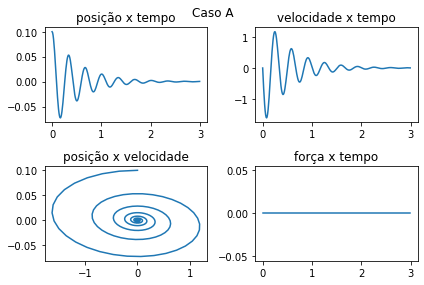

In [75]:
titulo = 'Caso A'

graficos(titulo, Xa, Va, ta, Fa)

#### Caso B

In [76]:
x0 = 0
xdot0 = 1.0

yb = [x0, xdot0]

In [77]:
ti = 0
tf = 3

tb = tempo(ti, tf)

In [78]:
Fb = lambda t: 0
params_b = params[:]
params_b[4] = Fb

In [79]:
Yb = resolve(carro, yb, tb, params_b)

In [80]:
Xb = Yb[:,0]
Vb = Yb[:,1]

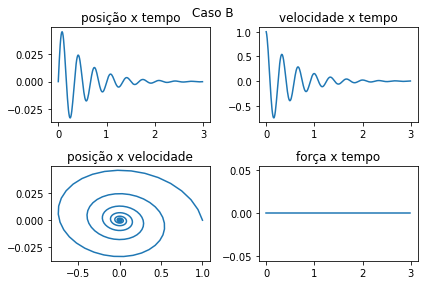

In [81]:
titulo = 'Caso B'

graficos(titulo, Xb, Vb, tb, Fb)

#### Caso C

In [82]:
x0 = 0.1
xdot0 = 1

yc = [x0, xdot0]

In [83]:
ti = 0
tf = 3

tc = tempo(ti, tf)

In [86]:
Fc = lambda t: 0
params_c = params[:]
params_c[4] = Fc
params_c[2] = 377

In [87]:
Yc = resolve(carro, yc, tc, params_c)

In [88]:
Xc = Yc[:,0]
Vc = Yc[:,1]

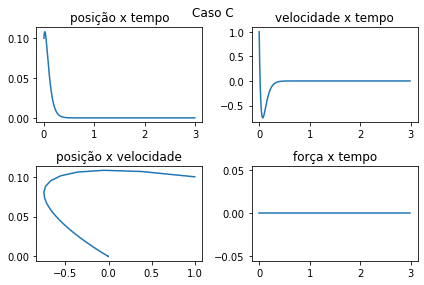

In [89]:
titulo = 'Caso C'

graficos(titulo, Xc, Vc, tc, Fc)

#### Caso D

In [42]:
x0 = 0
xdot0 = 0

yd = [x0, xdot0]

In [43]:
ti = 0
tf = 5

td = tempo(ti, tf)

In [91]:
F0d = 1000 #N
w = np.pi #rad/s
omega = np.pi/2

Fd = lambda t: F0d*np.sin(w*t + omega)

params_d = params[:]
params_d[4] = Fd

In [92]:
Yd = resolve(carro, yd, td, params_d)

In [93]:
Xd = Yd[:,0]
Vd = Yd[:,1]

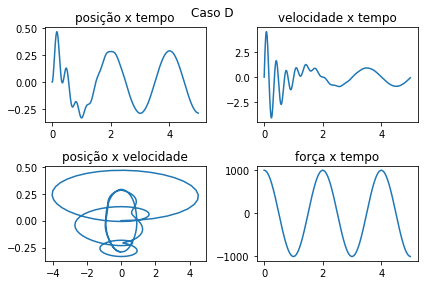

In [94]:
titulo = 'Caso D'

graficos(titulo, Xd, Vd, td, Fd)

#### Caso E

In [95]:
x0 = 0
xdot0 = 0

ye = [x0, xdot0]

In [96]:
ti = 0
tf = 3

te = tempo(ti, tf)

In [99]:
Fe = lambda t: 0 if t<0.5 else 1000

params_e = params[:]
params_e[4] = Fe

In [100]:
Ye = resolve(carro, ye, te, params_e)

In [101]:
Xe = Ye[:,0]
Ve = Ye[:,1]

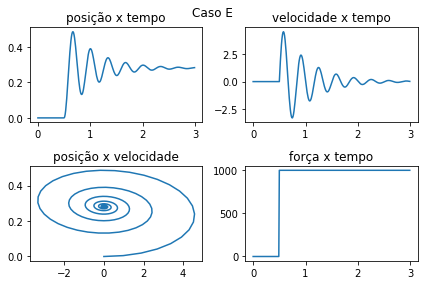

In [103]:
titulo = 'Caso E'

graficos(titulo, Xe, Ve, te, Fe)